Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

In [51]:
import thinkplot
import thinkstats2
import numpy as np
%matplotlib inline

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables? 

In [52]:
import nsfg
df = nsfg.ReadFemPreg()

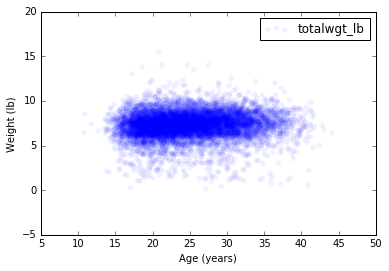

In [57]:
df = df.dropna(subset=['totalwgt_lb', 'agepreg'])
birth_wgt = df.totalwgt_lb
mother_age = df.agepreg

thinkplot.Scatter(mother_age, birth_wgt, alpha=0.06)
thinkplot.Show(ylabel='Weight (lb)',
               xlabel='Age (years)')

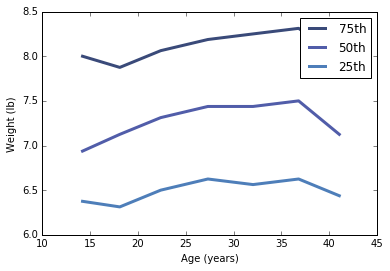

In [58]:
bins = np.arange(0, 50, 5)
indicies = np.digitize(df.agepreg, bins)
groups = df.groupby(indicies)

ages = [group.agepreg.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]

for percent in [75, 50, 25]:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(ages, weights, label=label)
    
thinkplot.Show(ylabel='Weight (lb)',
               xlabel='Age (years)')

In [60]:
corr = thinkstats2.Corr(mother_age, birth_wgt)
print "Pearson's correlation: %f" % corr

Pearson's correlation: 0.068834


In [61]:
corr = thinkstats2.SpearmanCorr(mother_age, birth_wgt)
print "Spearman's correlation: %f" % corr

Spearman's correlation: 0.094610


The mother's age at pregnancy outcome and the baby's weight do not have a strong correlation. There is a weak trend showing a positive correlation between the two variables. Therefore, it is slightly more likely that older women will give birth to heavier babies.